In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from strategy_utils import *

In [2]:
S0 = 100
S_range = np.linspace(50, 150, 1000)
scenarios = [85, 100, 115]

# Expanded option chain: strike : (call, put)
option_chain = {
    80:  (21, 1),
    85:  (17, 2),
    90:  (13, 3),
    95:  (10, 5),
    100: (7, 7),
    105: (5, 10),
    110: (3, 13),
    115: (2, 17),
    120: (1, 21)
}

# Unpack required premiums
c85, p85 = option_chain[85]
c90, p90 = option_chain[90]
c95, p95 = option_chain[95]
c100, p100 = option_chain[100]
c105, p105 = option_chain[105]
c110, p110 = option_chain[110]
c115, p115 = option_chain[115]

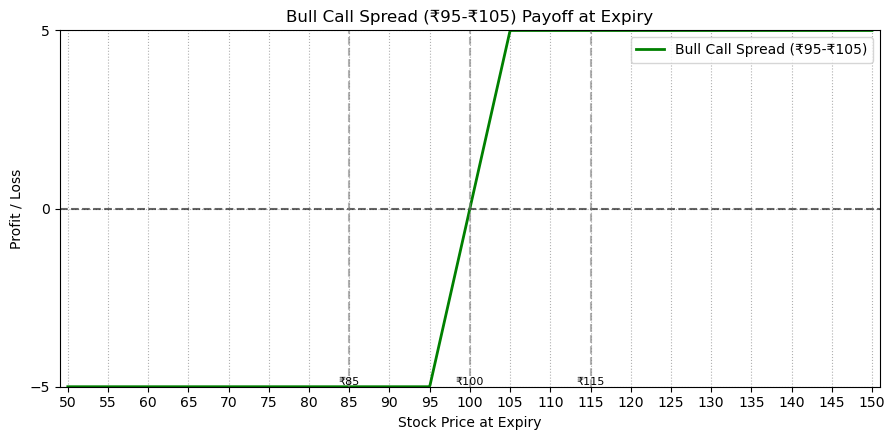

In [3]:
# Bull Call Spread: Buy 95C, Sell 105C
payoff_bull = bull_call_spread(S_range, 95, 105, c95, c105)
plot_payoff(S_range, payoff_bull, "Bull Call Spread (₹95-₹105)", "green", scenarios)

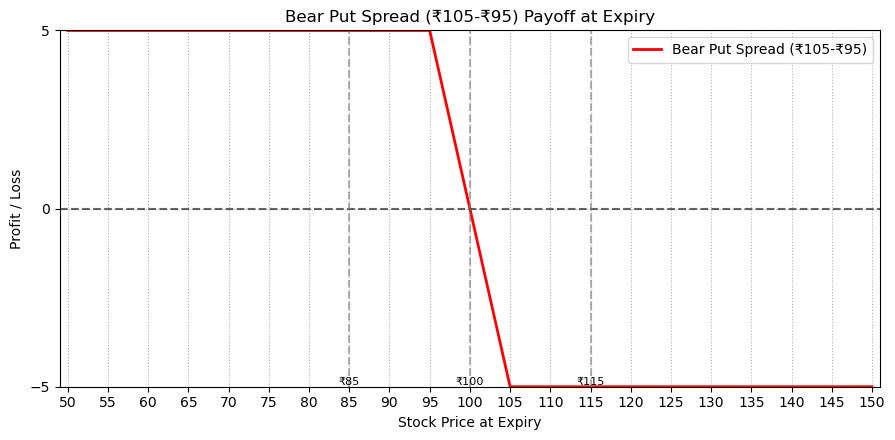

In [4]:
# Bear Put Spread: Buy 105P, Sell 95P
payoff_bear = bear_put_spread(S_range, 95, 105, p105, p95)
plot_payoff(S_range, payoff_bear, "Bear Put Spread (₹105-₹95)", "red", scenarios)

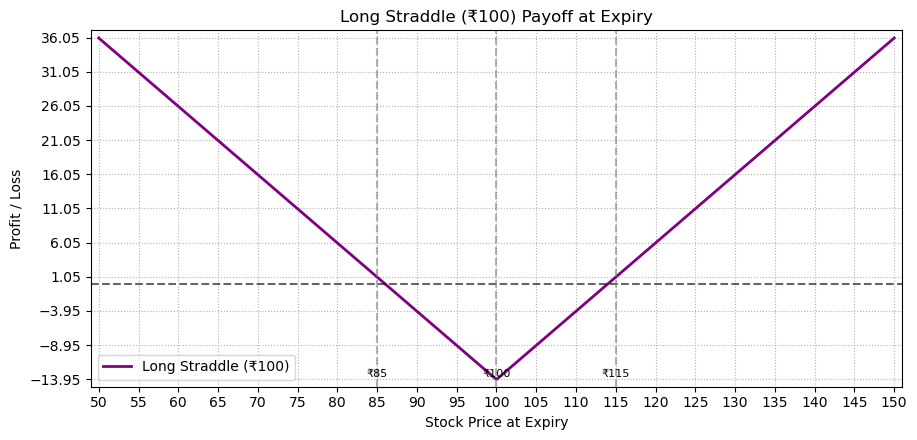

In [5]:
# Long Straddle: Buy 100C and 100P
payoff_straddle = long_straddle(S_range, 100, c100, p100)
plot_payoff(S_range, payoff_straddle, "Long Straddle (₹100)", "purple", scenarios)

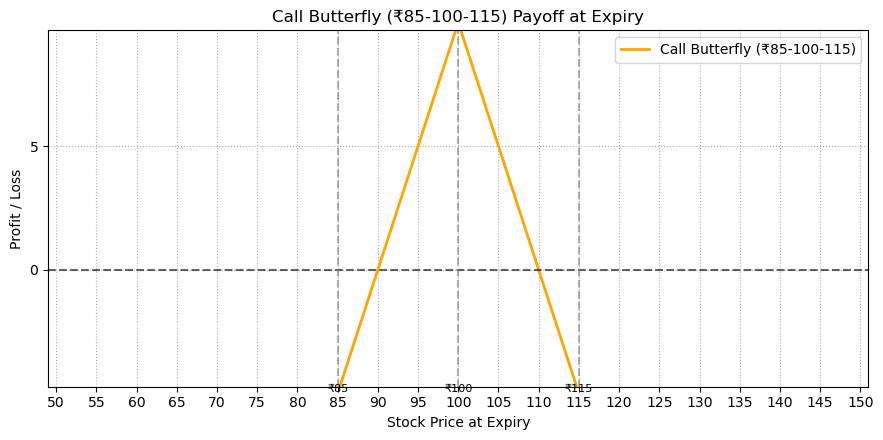

In [6]:
# Long Call Butterfly: Buy 85C, Sell 2x 100C, Buy 115C
payoff_butterfly = long_butterfly(S_range, 85, 100, 115, c85, c100, c115)
plot_payoff(S_range, payoff_butterfly, "Call Butterfly (₹85-100-115)", "orange", scenarios)

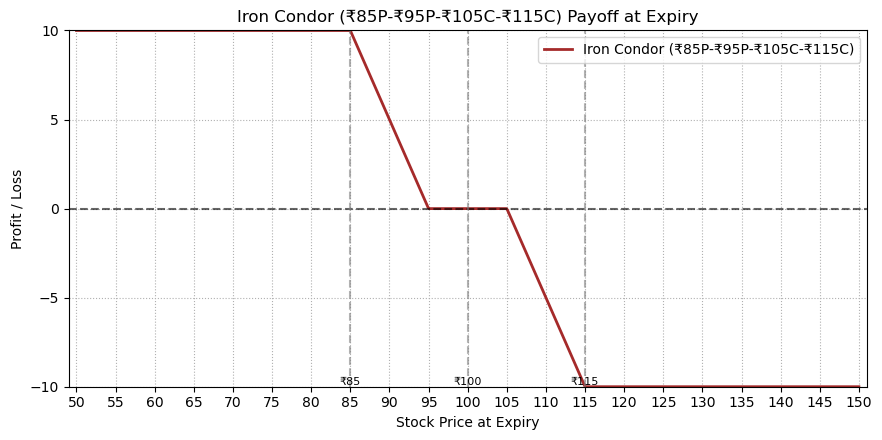

In [7]:
# Iron Condor: Sell 95P, Buy 85P, Sell 105C, Buy 115C
payoff_condor = iron_condor(S_range, 85, 95, 105, 115, p85, p95, c105, c115)
plot_payoff(S_range, payoff_condor, "Iron Condor (₹85P-₹95P-₹105C-₹115C)", "brown", scenarios)

In [8]:
def get_value_at(S_range, payoff, price):
    index = np.argmin(np.abs(S_range - price))
    return round(payoff[index], 2)

scenario_table = []
for price in scenarios:
    row = {
        "S": price,
        "Bull Call": get_value_at(S_range, payoff_bull, price),
        "Bear Put": get_value_at(S_range, payoff_bear, price),
        "Straddle": get_value_at(S_range, payoff_straddle, price),
        "Butterfly": get_value_at(S_range, payoff_butterfly, price),
        "Iron Condor": get_value_at(S_range, payoff_condor, price)
    }
    scenario_table.append(row)

df = pd.DataFrame(scenario_table)
df.set_index("S", inplace=True)
df.T.style.background_gradient(axis=1, cmap="RdYlGn")

S,85,100,115
Bull Call,-5.000000,-0.050000,5.000000
Bear Put,5.000000,0.050000,-5.000000
Straddle,0.960000,-13.950000,0.960000
Butterfly,-4.960000,9.950000,-4.960000
Iron Condor,9.960000,0.000000,-9.960000


### Strategic Insights – ZytonTech Case

#### Bull Call (₹95–₹105)
- Profits in moderate bullish move (₹115)
- Small loss if price stays flat or drops

#### Bear Put (₹105–₹95)
- Works when market drops below ₹95
- Loses value in bullish move

#### Straddle (₹100)
- Wins only with large moves
- Suffers max loss near ₹100 due to double premium

#### Call Butterfly (₹85–₹100–₹115)
- Works best if ZTCH closes near ₹100
- Very limited gain/loss — low risk profile

#### Iron Condor (₹85P–₹95P–₹105C–₹115C)
- Profitable if ZTCH remains in ₹95–₹105 range
- High loss if outside wings — especially on breakout

---

Best strategy depends on trader’s volatility outlook:
- Expecting **volatility**: Straddle or Wide Spreads  
- Expecting **sideways**: Iron Condor or Butterfly  
- Expecting **direction**: Bull/Bear spreads